
The two loss functions from Kim et al are very highly correlated. Must be an algebraic identity
So an ensemble that uses both is very similar to one that uses two of the same.

In [102]:
 from torch.nn.functional import one_hot
from torch import nn

 def get_loss_wa(logits, labels):
        """
        get loss from wrong answers
        """

        loss_fn = nn.BCEWithLogitsLoss()
        hot_labels = one_hot(labels, num_classes=5).float()  # (bs,num_choices)
        return loss_fn(logits, hot_labels).item()

def get_loss_ra(logits, labels):
        """
        Run the model and get loss and predictions from right answers
        """
        loss_fn = nn.CrossEntropyLoss()
        return loss_fn(logits, labels).item()


In [103]:
import torch

torch.manual_seed(42)
logits = torch.rand((1000,5))
labels = torch.randint(5,size=(1000,))


In [104]:
get_loss_wa(logits, labels)

0.8817875981330872

In [105]:
get_loss_ra(logits,labels)

1.6390104293823242

In [106]:
torch.manual_seed(42)

all_logits = [(torch.rand(100,5),torch.randint(0,5,size=(100,))) for _ in range(100)]


In [107]:
scores1 = [get_loss_wa(logits,labels) for logits,labels in all_logits]
scores2 =  [get_loss_ra(logits,labels) for logits,labels in all_logits]

In [108]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(dict(scores1=scores1,scores2=scores2))

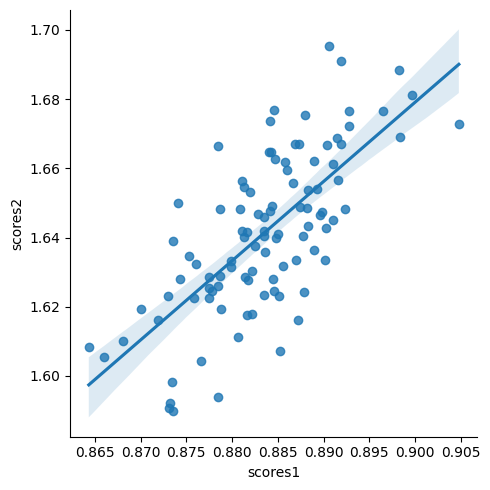

In [109]:
sns.lmplot(data=df,x="scores1",y="scores2")

In [110]:
import statsmodels.api as sm

model = sm.OLS(scores2,scores2)
results = model.fit(disp=0)

In [111]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.164e+32
Date:                Fri, 15 Mar 2024   Prob (F-statistic):                        0.00
Time:                        07:03:30   Log-Likelihood:                          3301.5
No. Observations:                 100   AIC:                                     -6601.
Df Residuals:                      99   BIC:                                     -6598.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/brewc/PycharmProjects/case_hold_wrong_answers/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/Users/brewc/PycharmProjects/case_hold_wrong_answers/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/Users/brewc/PycharmProjects/case_hold_wrong_answers/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1584: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/br

Should maybe try a different loss function. It could make sense to use a ranking loss that rewards each time the right answer is ranked above a wrong answer.


In [3]:
from datasets import load_dataset